## **Part 1: Data Understanding**
Load the dataset (crx.data) into a pandas DataFrame.

In [189]:
import pandas as pd

data = pd.read_csv('crx.data', header=None)

Checking the data types of the attributes to know which are nominal and which are numeric

In [190]:
data.value_counts()

0  1      2       3  4  5   6  7      8  9  10  11  12  13     14    15
?  20.08  0.125   u  g  q   v  1.000  f  t  1   f   g   00240  768   +     1
b  30.17  6.500   u  g  cc  v  3.125  t  t  8   f   g   00330  1200  +     1
   29.67  1.415   u  g  w   h  0.750  t  t  1   f   g   00240  100   +     1
   29.83  1.250   y  p  k   v  0.250  f  f  0   f   g   00224  0     -     1
          2.040   y  p  x   h  0.040  f  f  0   f   g   00128  1     -     1
                                                                          ..
   16.50  0.125   u  g  c   v  0.165  f  f  0   f   g   00132  0     -     1
   16.92  0.335   y  p  k   v  0.290  f  f  0   f   s   00200  0     -     1
   17.08  0.085   y  p  c   v  0.040  f  f  0   f   g   00140  722   -     1
          0.250   u  g  q   v  0.335  f  t  4   f   g   00160  8     -     1
   ?      10.500  u  g  x   v  6.500  t  f  0   f   g   00000  0     +     1
Name: count, Length: 690, dtype: int64

For nominal (categorical) attributes, provide the frequency for each possible value.

In [191]:
nominal_columns = [0, 3, 4, 5, 6, 8, 9, 11, 12]
for col in nominal_columns:
    print(data[col].value_counts())

0
b    468
a    210
?     12
Name: count, dtype: int64
3
u    519
y    163
?      6
l      2
Name: count, dtype: int64
4
g     519
p     163
?       6
gg      2
Name: count, dtype: int64
5
c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
?       9
r       3
Name: count, dtype: int64
6
v     399
h     138
bb     59
ff     57
?       9
j       8
z       8
dd      6
n       4
o       2
Name: count, dtype: int64
8
t    361
f    329
Name: count, dtype: int64
9
f    395
t    295
Name: count, dtype: int64
11
f    374
t    316
Name: count, dtype: int64
12
g    625
s     57
p      8
Name: count, dtype: int64


For continuous attributes, calculate and report the minimum, maximum, median, mean, standard deviation, and quantiles (25%, 50%, 75%).

In [192]:
continuous_columns = data.columns[[1, 2, 7, 10, 13, 14]].tolist()
for column in continuous_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

stats = data[continuous_columns].describe()
print(stats)


               1           2           7          10           13  \
count  678.000000  690.000000  690.000000  690.00000   677.000000   
mean    31.568171    4.758725    2.223406    2.40000   184.014771   
std     11.957862    4.978163    3.346513    4.86294   173.806768   
min     13.750000    0.000000    0.000000    0.00000     0.000000   
25%     22.602500    1.000000    0.165000    0.00000    75.000000   
50%     28.460000    2.750000    1.000000    0.00000   160.000000   
75%     38.230000    7.207500    2.625000    3.00000   276.000000   
max     80.250000   28.000000   28.500000   67.00000  2000.000000   

                  14  
count     690.000000  
mean     1017.385507  
std      5210.102598  
min         0.000000  
25%         0.000000  
50%         5.000000  
75%       395.500000  
max    100000.000000  


50% is the median for the above attributes

## **Part 2: Data Processing**
Identify and report the number of missing values in the dataset.

Converting the '?' values to 'NaN' values to find the missing values in the dataset

In [193]:
import numpy as np
data.replace('?', np.nan, inplace=True)

In [194]:
missing_values = data.isnull().sum()
print(missing_values)

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64


For nominal attributes, replace missing values with the mode.

In [195]:
for col in nominal_columns:
    mode = data[col].mode()[0]
    data[col].fillna(mode, inplace=True)

For continuous attributes, replace missing values with the mean.

In [196]:
for col in continuous_columns:
    mean = data[col].mean()
    data[col].fillna(mean, inplace=True)

To check whether all the missing values have been replaced.

In [197]:
missing_values = data.isnull().sum()
print(missing_values)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64


## **Part 3: Data Visualization**
Create side-by-side boxplots for continuous attributes A2, A3, A8, A11

In [198]:
print(data[1].head(10))

0    30.83
1    58.67
2    24.50
3    27.83
4    20.17
5    32.08
6    33.17
7    22.92
8    54.42
9    42.50
Name: 1, dtype: float64


In [199]:
data[1].fillna(0, inplace=True)

In [200]:
data[1] = pd.to_numeric(data[1], errors='coerce')

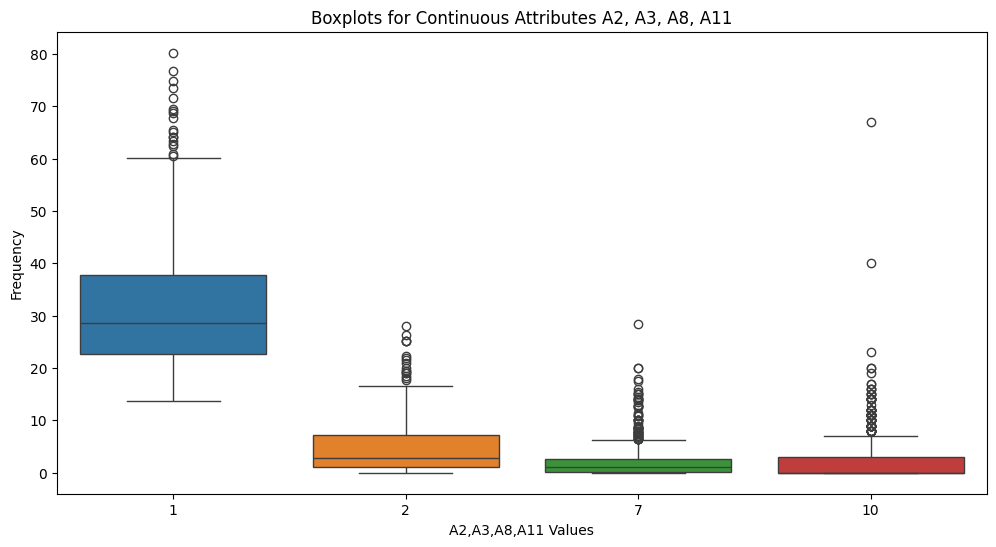

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=data[[1,2,7,10]])
plt.title('Boxplots for Continuous Attributes A2, A3, A8, A11')
plt.xlabel('A2,A3,A8,A11 Values')
plt.ylabel('Frequency')
plt.show()


Create a bar chart for nominal attribute A4

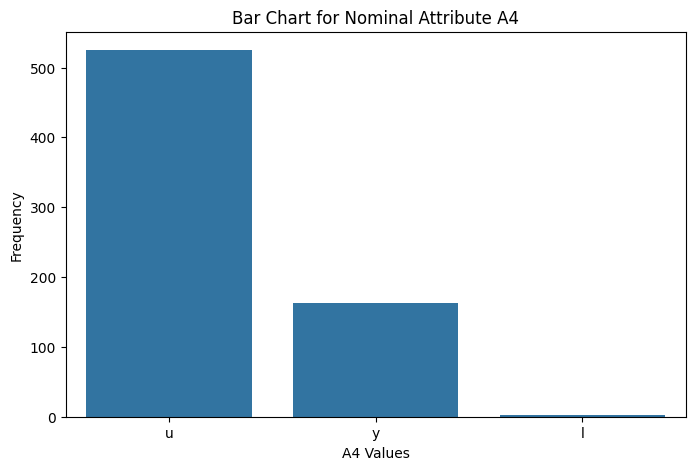

In [202]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data[3])
plt.title('Bar Chart for Nominal Attribute A4')
plt.xlabel('A4 Values')
plt.ylabel('Frequency')
plt.show()


Plot histograms for continuous attribute A15

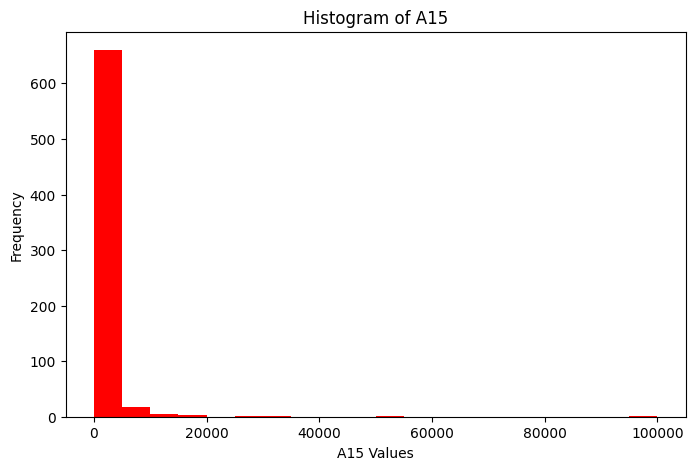

In [203]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(data[14], bins=20, color='red')
plt.title('Histogram of A15')
plt.xlabel('A15 Values')
plt.ylabel('Frequency')
plt.show()


What do you observe from this distribution? How can you better visualize A15 with a histogram plot?

We will check for skewness of A15

In [204]:
skewness = data[14].skew()
print(f"Skewness of A15: {skewness}")

Skewness of A15: 13.140655014445459


Skewness > 0, so its positively skewed. We will use boxplot to find the outliners.

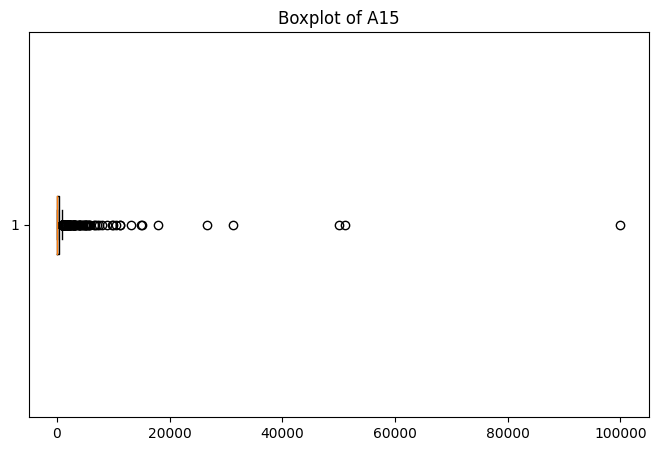

In [205]:
plt.figure(figsize=(8, 5))
plt.boxplot(data[14], vert=False)
plt.title('Boxplot of A15')
plt.show()


Since A15 is heavily skewed, We will apply a log transformation to reduce skewness and make the data more normal.

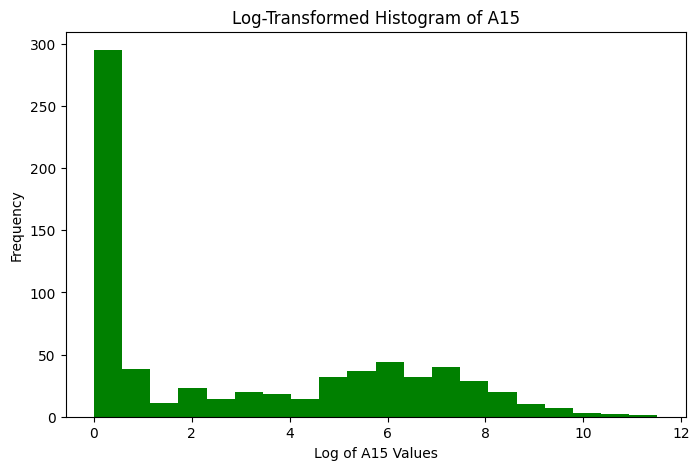

In [206]:
import numpy as np

data[14] = np.log(data[14] + 1)

plt.figure(figsize=(8, 5))
plt.hist(data[14], bins=20, color='green')
plt.title('Log-Transformed Histogram of A15')
plt.xlabel('Log of A15 Values')
plt.ylabel('Frequency')
plt.show()
